In [4]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [7]:
# pip install opencv-python
import cv2
import PIL
import os
import pathlib

# Load data

In [84]:
# url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
# tf.keras.utils.get_file('flowers_photos',origin=url,cache_dir='.',untar=True)
path = './flower_photos/'
for p in os.listdir(path):
    print(p)
    
data_dir = pathlib.Path(path)
data_dir

daisy
dandelion
roses
sunflowers
tulips


WindowsPath('flower_photos')

In [85]:
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

In [86]:
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))
len(roses)

641

# EDA

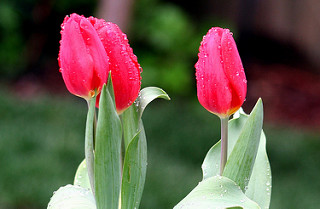

In [88]:
print(str(tulips[0]))
PIL.Image.open(str(tulips[0]))

In [89]:
flowers_images_dict = {
    'daisy' : daisy,
    'dandelion' : dandelion,
    'roses' : roses,
    'sunflowers' : sunflowers,
    'tulips' : tulips
}

flowers_labels_dict = {
    'daisy' : 0,
    'dandelion' : 1,
    'roses' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [90]:
flowers_images_dict['roses']
print(flowers_images_dict.keys())
print(len(flowers_images_dict.keys()))

dict_keys(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'])

## CV2 -  Read images into cv object - convert image into 3D numpy array 

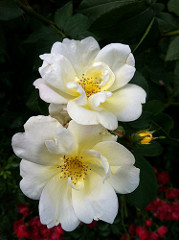

In [91]:
img_path = str(flowers_images_dict['roses'][0])
PIL.Image.open(img_path)

In [187]:
img = cv2.imread(img_path) # covert image to numpy array
print(np.shape(img))
cv2.resize(img,(100,100)).shape

(240, 179, 3)


(100, 100, 3)

#### prepare x,y and resize all images 100x100

In [102]:
x = []
y = []

for class_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resized = cv2.resize(img,(100,100))
        x.append(img_resized)
        y.append(flowers_labels_dict[class_name])


#### train test split

In [111]:
from sklearn.model_selection import train_test_split

x = np.array(x)
y = np.array(y)
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0)

In [113]:
x_train.shape , y_train.shape

((2752, 100, 100, 3), (2752,))

In [115]:
x_test.shape , y_test.shape

((918, 100, 100, 3), (918,))

## Preprocessing

In [118]:
np.max(x_train) , np.min(x_train) , np.mean(x_train) 

(255, 0, 101.27527082122093)

In [119]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

## Model

In [122]:
num_classes = len(flowers_images_dict.keys())
num_classes

5

In [126]:
model = keras.models.Sequential([
    #cnn
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(), #2D array
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(num_classes) #default linear activation #, activation='softmax'
    
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x_train_scaled, y_train, epochs=10)
model.evaluate(x_test_scaled, y_test)

Epoch 1/10
86/86 [==============================] - 33s 372ms/step - loss: 1.3539 - accuracy: 0.4073
Epoch 2/10
86/86 [==============================] - 32s 369ms/step - loss: 1.0730 - accuracy: 0.5709
Epoch 3/10
86/86 [==============================] - 30s 344ms/step - loss: 0.9346 - accuracy: 0.6323
Epoch 4/10
86/86 [==============================] - 30s 353ms/step - loss: 0.8096 - accuracy: 0.6919
Epoch 5/10
86/86 [==============================] - 30s 350ms/step - loss: 0.7084 - accuracy: 0.7282
Epoch 6/10
86/86 [==============================] - 33s 380ms/step - loss: 0.5767 - accuracy: 0.7871
Epoch 7/10
86/86 [==============================] - 32s 370ms/step - loss: 0.4513 - accuracy: 0.8325
Epoch 8/10
86/86 [==============================] - 31s 357ms/step - loss: 0.3303 - accuracy: 0.8823
Epoch 9/10
86/86 [==============================] - 31s 362ms/step - loss: 0.2478 - accuracy: 0.9142
Epoch 10/10
29/29 [==============================] - 4s 113ms/step - loss: 1.3302 - accurac

[1.330249309539795, 0.656862735748291]

In [188]:
print('Training set : ',model.evaluate(x_train_scaled, y_train))
print('Testing set :',model.evaluate(x_test_scaled, y_test))

86/86 [==============================] - 9s 106ms/step - loss: 0.0889 - accuracy: 0.9807
Training set :  [0.08891477435827255, 0.9807412624359131]
29/29 [==============================] - 3s 101ms/step - loss: 1.3302 - accuracy: 0.6569
Testing set : [1.330249309539795, 0.656862735748291]


In [189]:
y_pred = model.predict(x_test_scaled)
y_pred

29/29 [==============================] - 3s 103ms/step


array([[-1.7435331 ,  3.9987147 , -1.2199334 , -2.400178  , -1.9148296 ],
       [ 3.6729317 , -2.0534856 ,  2.949196  , -6.2594624 , -0.59882385],
       [-0.66738623, -2.675113  ,  7.276451  , -7.15347   ,  4.158939  ],
       ...,
       [-8.151174  , -4.4010015 , -1.7564094 ,  2.212275  ,  0.44772378],
       [ 9.380013  ,  1.6805645 , -0.20262162, -4.323781  ,  1.3053437 ],
       [-9.141189  , -0.5582084 , -0.13122497,  3.9182146 ,  0.43176597]],
      dtype=float32)

In [190]:
def predict(i):
    print(y_pred[i])
    print(tf.nn.softmax(y_pred[i]))
    print('Predicted :',np.argmax(tf.nn.softmax(y_pred[i])))
    print('Truth :',y_test[i])

predict(5)

[-12.6447525   -1.0321037   -7.649664     6.6529374   -0.89979815]
tf.Tensor([4.1561616e-09 4.5919971e-04 6.1380706e-07 9.9901605e-01 5.2415679e-04], shape=(5,), dtype=float32)
Predicted : 3
Truth : 3


## Handle overfitting - Data Augmentation

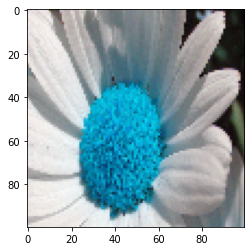

In [183]:
plt.imshow(x[1])

### RandomRotation

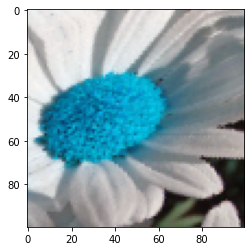

In [192]:
data_augmentation_3 = keras.models.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.5), #randomly rotates images during training.
])
im1= data_augmentation_3(x)[1].numpy().astype('uint8')
plt.imshow(im1)

## Model with data augmentation

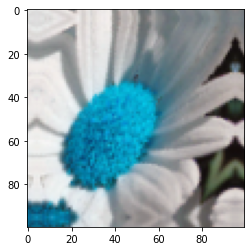

In [191]:
data_augmentaion = keras.models.Sequential([
    #keras.layers.experimental.preprocessing.RandomFlip(), #randomly flips images
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
])
plt.imshow(data_augmentaion(x)[1].numpy().astype('uint8'))

In [194]:
model_aug = keras.models.Sequential([
    data_augmentaion,
    #cnn
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(), #2D array
    keras.layers.Dropout(0.2),
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(num_classes) #default linear activation #, activation='softmax'
    
])
model_aug.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_aug.fit(x_train_scaled, y_train, epochs=10)
model_aug.evaluate(x_test_scaled, y_test)

Epoch 1/10
86/86 [==============================] - 48s 434ms/step - loss: 1.3449 - accuracy: 0.4113
Epoch 2/10
86/86 [==============================] - 37s 425ms/step - loss: 1.0890 - accuracy: 0.5596
Epoch 3/10
86/86 [==============================] - 38s 446ms/step - loss: 0.9743 - accuracy: 0.6079
Epoch 4/10
86/86 [==============================] - 42s 489ms/step - loss: 0.9041 - accuracy: 0.6523
Epoch 5/10
86/86 [==============================] - 36s 423ms/step - loss: 0.8520 - accuracy: 0.6733
Epoch 6/10
86/86 [==============================] - 36s 418ms/step - loss: 0.7921 - accuracy: 0.6868
Epoch 7/10
86/86 [==============================] - 33s 385ms/step - loss: 0.7517 - accuracy: 0.7126
Epoch 8/10
86/86 [==============================] - 35s 406ms/step - loss: 0.7074 - accuracy: 0.7297
Epoch 9/10
86/86 [==============================] - 35s 409ms/step - loss: 0.6746 - accuracy: 0.7427
Epoch 10/10
29/29 [==============================] - 4s 102ms/step - loss: 0.8370 - accurac

[0.8369593024253845, 0.6633986830711365]

In [195]:
print('Training set : ',model_aug.evaluate(x_train_scaled, y_train))
print('Testing set :',model_aug.evaluate(x_test_scaled, y_test))

86/86 [==============================] - 9s 100ms/step - loss: 0.6082 - accuracy: 0.7714
Training set :  [0.6081721782684326, 0.7714389562606812]
29/29 [==============================] - 3s 102ms/step - loss: 0.8370 - accuracy: 0.6634
Testing set : [0.8369593024253845, 0.6633986830711365]


In [196]:
print('Training set : ',model.evaluate(x_train_scaled, y_train))
print('Testing set :',model.evaluate(x_test_scaled, y_test))

86/86 [==============================] - 10s 111ms/step - loss: 0.0889 - accuracy: 0.9807
Training set :  [0.08891477435827255, 0.9807412624359131]
29/29 [==============================] - 3s 99ms/step - loss: 1.3302 - accuracy: 0.6569
Testing set : [1.330249309539795, 0.656862735748291]


In [197]:
#Overfitting reduced